<a href="https://colab.research.google.com/github/RifatMuhtasim/Deep_Learning/blob/main/Learn/21.Handling_Imbalanced_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
df0 = pd.read_csv("https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/11_chrun_prediction/customer_churn.csv")
print(df0.shape)
df0.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Inspection

In [ ]:
df0.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df1 = df0.drop("customerID", axis="columns")
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')
df1['TotalCharges'].dtypes

dtype('float64')

## Data Exploration

In [ ]:
mc_churn_no = df1[df1['Churn']=="No"]['tenure']
mc_churn_yes = df1[df1['Churn'] == "Yes"]['tenure']

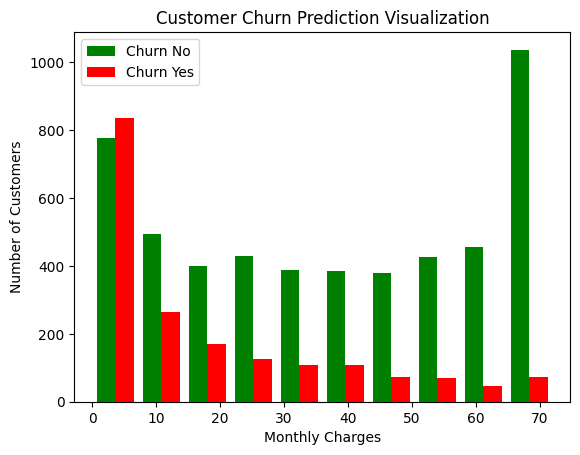

In [ ]:
plt.hist([mc_churn_no, mc_churn_yes], color=['green', 'red'], label=['Churn No', 'Churn Yes'])
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")
plt.legend()
plt.show()

# Data Cleaning and Label encoding.

In [ ]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
# Unique value
def Print_the_unique_value(df):
  for col in df:
    if df[col].dtypes == "object":
      print(f'{col}: {df[col].unique()}')

Print_the_unique_value(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [ ]:
# Replace the unnecessary value
df1.replace({'No internet service': "No", 'No phone service': 'No'}, inplace=True)

In [ ]:
# Binary Label
df1.replace({"Yes": 1, "No": 0 }, inplace=True)

In [ ]:
# Gender
df1.replace({'Male': 1, "Female": 0}, inplace=True)

In [ ]:
df1.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2815,1,0,0,0,3,1,0,Fiber optic,0,0,1,1,1,0,Month-to-month,1,Mailed check,88.35,262.05,1
2221,0,0,1,1,71,1,0,DSL,1,1,1,1,0,0,Two year,0,Credit card (automatic),64.05,4492.90,0
6403,1,0,1,1,72,1,1,Fiber optic,1,1,1,1,1,1,Two year,1,Bank transfer (automatic),116.60,8337.45,0


In [ ]:
df1['InternetService'] = df1['InternetService'].apply(lambda x: "No" if x == 0 else x)

In [ ]:
df2 = df1.copy()
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


## Dummy variables

In [ ]:
df3 = pd.get_dummies(data=df2, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,0,0,1,0


In [ ]:
# MinMax Scaling
scaler = MinMaxScaler()
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

df3[cols_to_scale] = scaler.fit_transform(df3[cols_to_scale])

In [ ]:
df = df3.copy()
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.013889,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,0,0,0,0,0,1,0
1,1,0,0,0,0.472222,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,0,0,1,0,0,0,1
2,1,0,0,0,0.027778,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,0,0,0,0,0,0,1
3,1,0,0,0,0.625000,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,0,0,1,0,0,0,0
4,0,0,0,0,0.027778,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,1,0,0,0,0,1,0


In [ ]:
df.isna().sum()

gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
MultipleLines                             0
OnlineSecurity                            0
OnlineBackup                              0
DeviceProtection                          0
TechSupport                               0
StreamingTV                               0
StreamingMovies                           0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
InternetService_Fiber optic               0
InternetService_No                        0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check  

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(7032, 24)

In [ ]:
def ANN(X_train, X_test, y_train, y_test, weights, epochs):
  model = keras.Sequential([
      keras.layers.Dense(23, input_shape=(23, ), activation="relu"),
      keras.layers.Dense(12, activation="relu"),
      keras.layers.Dense(6, activation="relu"),
      keras.layers.Dense(4, activation="relu"),
      keras.layers.Dense(1, activation="sigmoid")
  ])

  model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])
  if weights == -1:
    model.fit(X_train, y_train, epochs=epochs)
  else:
    model.fit(X_train, y_train, epochs=epochs, class_weight = weights)

  print("Evaluate Model: \n", model.evaluate(X_test, y_test))

  y_pred = np.round(model.predict(X_test))
  print("Classification Model: \n", classification_report(y_test, y_pred))
  return y_pred

# Make the balanced Dataset with UnderSampling

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.013889,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,0,0,0,0,0,1,0
1,1,0,0,0,0.472222,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,0,0,1,0,0,0,1
2,1,0,0,0,0.027778,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,0,0,0,0,0,0,1
3,1,0,0,0,0.625000,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,0,0,1,0,0,0,0
4,0,0,0,0,0.027778,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,1,0,0,0,0,1,0


In [ ]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
df_churn0 = df[df['Churn'] == 0]
df_churn1 = df[df['Churn'] == 1]
df_under0 = df_churn0.sample(len(df_churn1))
df_under0.shape

(1869, 24)

In [ ]:
df_test_under = pd.concat([df_churn1, df_under0], axis="rows")
df_test_under['Churn'].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [ ]:
X = df_test_under.drop("Churn", axis="columns")
y = df_test_under['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [ ]:
y_pred_undersample = ANN(X_train, X_test, y_train, y_test, -1, 50)

Epoch 1/50
94/94 [==============================] - 4s 5ms/step - loss: 0.6089 - accuracy: 0.7060
Epoch 2/50
94/94 [==============================] - 1s 6ms/step - loss: 0.5237 - accuracy: 0.7465
Epoch 3/50
94/94 [==============================] - 1s 6ms/step - loss: 0.5089 - accuracy: 0.7502
Epoch 4/50
94/94 [==============================] - 0s 5ms/step - loss: 0.5023 - accuracy: 0.7525
Epoch 5/50
94/94 [==============================] - 1s 6ms/step - loss: 0.4970 - accuracy: 0.7595
Epoch 6/50
94/94 [==============================] - 0s 4ms/step - loss: 0.4897 - accuracy: 0.7672
Epoch 7/50
94/94 [==============================] - 0s 4ms/step - loss: 0.4892 - accuracy: 0.7622
Epoch 8/50
94/94 [==============================] - 0s 4ms/step - loss: 0.4850 - accuracy: 0.7699
Epoch 9/50
94/94 [==============================] - 0s 4ms/step - loss: 0.4817 - accuracy: 0.7722
Epoch 10/50
94/94 [==============================] - 0s 4ms/step - loss: 0.4793 - accuracy: 0.7696
Epoch 11/50
94/94 [

# Oversampling

In [ ]:
df_class0 = df[df['Churn'] == 0]
df_class1 = df[df['Churn'] == 1]
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
df_class1_over = df_class1.sample(len(df_class0), replace=True)
df_class1_over.shape

(5163, 24)

In [ ]:
df_class_over = pd.concat([df_class0, df_class1_over], axis="rows")
df_class_over['Churn'].value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [ ]:
# Train Test Split
X = df_class_over.drop('Churn', axis="columns")
y = df_class_over['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [ ]:
y_pred_over = ANN(X_train, X_test, y_train, y_test, -1, 300)

Epoch 1/100
259/259 [==============================] - 5s 6ms/step - loss: 0.6023 - accuracy: 0.7126
Epoch 2/100
259/259 [==============================] - 2s 6ms/step - loss: 0.5433 - accuracy: 0.7576
Epoch 3/100
259/259 [==============================] - 2s 6ms/step - loss: 0.5246 - accuracy: 0.7630
Epoch 4/100
259/259 [==============================] - 2s 6ms/step - loss: 0.5113 - accuracy: 0.7696
Epoch 5/100
259/259 [==============================] - 2s 7ms/step - loss: 0.5014 - accuracy: 0.7703
Epoch 6/100
259/259 [==============================] - 2s 8ms/step - loss: 0.4957 - accuracy: 0.7686
Epoch 7/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4886 - accuracy: 0.7713
Epoch 8/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4843 - accuracy: 0.7725
Epoch 9/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4788 - accuracy: 0.7743
Epoch 10/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4755 - accura

# SMOTE

In [ ]:
X = df.drop('Churn', axis="columns")
y = df['Churn']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="minority")
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, stratify=y_sm)
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [ ]:
y_pred_smote = ANN(X_train, X_test, y_train, y_test, -1, 100)

Epoch 1/100
259/259 [==============================] - 4s 6ms/step - loss: 0.6381 - accuracy: 0.6461
Epoch 2/100
259/259 [==============================] - 2s 6ms/step - loss: 0.5640 - accuracy: 0.7763
Epoch 3/100
259/259 [==============================] - 2s 6ms/step - loss: 0.5384 - accuracy: 0.7751
Epoch 4/100
259/259 [==============================] - 2s 6ms/step - loss: 0.5030 - accuracy: 0.7804
Epoch 5/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4794 - accuracy: 0.7861
Epoch 6/100
259/259 [==============================] - 2s 7ms/step - loss: 0.4654 - accuracy: 0.7881
Epoch 7/100
259/259 [==============================] - 2s 7ms/step - loss: 0.4572 - accuracy: 0.7892
Epoch 8/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4530 - accuracy: 0.7910
Epoch 9/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4460 - accuracy: 0.7930
Epoch 10/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4407 - accura

# Ensemble